
- Part 1: Explore the `Breast Cancer` dataset, train Random Forest, Logistic  Regression and SVM classifiers on it. 
- Part 2: Build a sentiment analyzer using the Naive Bayes algorithm on dataset `Amazon_review_20220923.txt`

Train Random Forest, Logistic Regression and SVM classifiers on the `Breat Cancer` dataset.

### Data Exploration
Load the dataset **'Breast Cancer'** from `sklearn.datasets` and perform an exploration of the Breast Cancer dataset. This includes analyzing the correlations between features and applying Principal Component Analysis (PCA) for data dimensionality reduction.

- PCA is a statistical technique used in the field of data science and machine learning for the purpose of dimensionality reduction, while preserving as much of the data's variation as possible. You can know more from [here](https://builtin.com/data-science/step-step-explanation-principal-component-analysis). The scatter plot of the first two principal components can reveal interesting data patterns. The package refers to this [link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

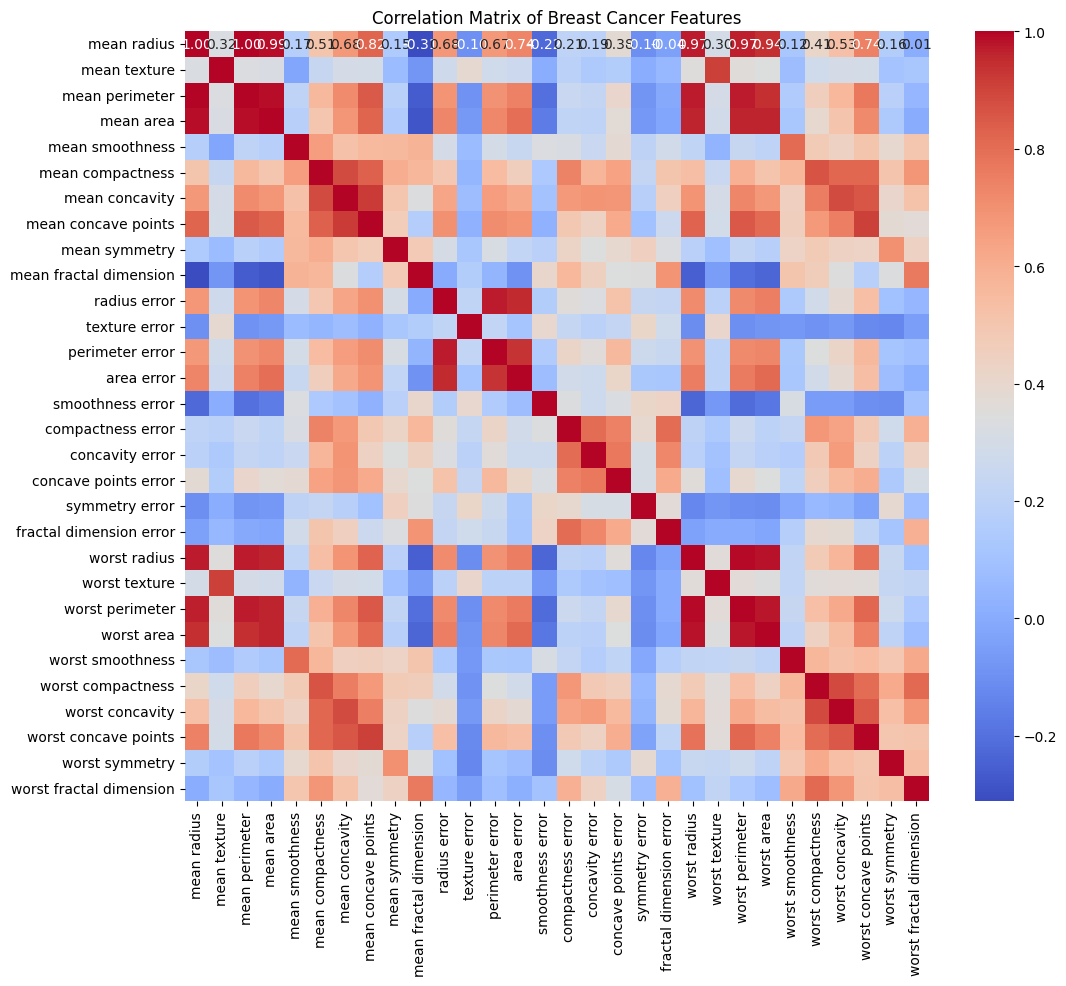

/Users/aldensio/micromamba/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aldensio/micromamba/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aldensio/micromamba/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aldensio/micromamba/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

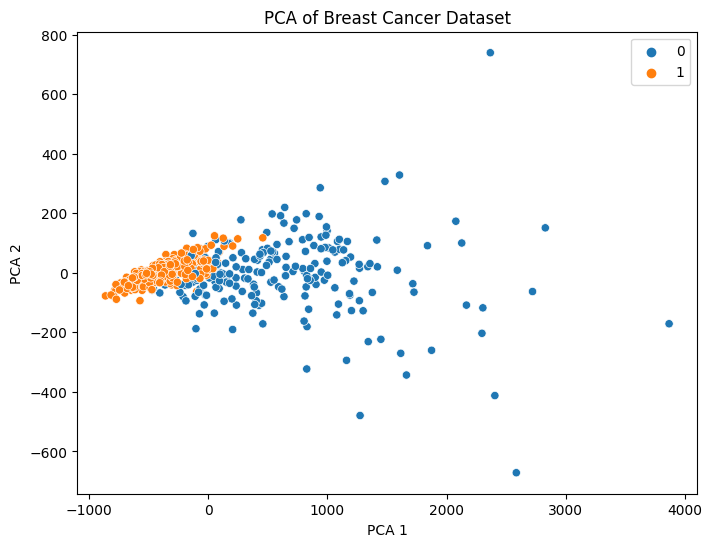

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Data Exploration
cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data.head()

correlation_matrix = data.corr()

# plotting
plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Breast Cancer Features")
plt.show()

# PCA for data dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cancer.target)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Breast Cancer Dataset')
plt.show()

### Data Splitting 

Now we prepare the dataset for training and testing:

- Split the two datasets into training and test sets using Stratified Sampling
- Explain why stratified sampling might be more appropriate than random sampling in this context

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit

### Data Splitting
X = cancer.data
Y = cancer.target

splits = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
# print(splits.split)

for train, test in splits.split(X, Y):
    X_train, X_test = X[train], X[test]
    Y_train, Y_test = Y[train], Y[test]

'\nIn medical datasets like the Breast Cancer dataset, the distribution of classes might be imbalanced.\nPerforming stratified sampling maintains the ratio in each of the training and test sets, hence representing the overall dsitribution of the classes.\nThis improves the accuracy/performance of the model trained across all classses.\n\nAdditionally, the model gets exposed to all variations of the class during training, \nreducing the risk of overfitting on the majority class and underfitting on the minority class.\n'

### The benefits of stratified sampling:

In medical datasets like the Breast Cancer dataset, the distribution of classes might be imbalanced.
Performing stratified sampling maintains the ratio in each of the training and test sets, hence representing the overall dsitribution of the classes.
This improves the accuracy/performance of the model trained across all classses.

Additionally, the model gets exposed to all variations of the class during training, 
reducing the risk of overfitting on the majority class and underfitting on the minority class.

### Logistic Regression
Implement Logistic Regression models on the dataset with L1 and L2 regularization respectively. Train with the training set, then evaluate the two models performance on the testset. Show the accuracy and confusion matrix in the outcome.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#l1
l1 = LogisticRegression(penalty="l1", solver="liblinear", max_iter=10000)
l1.fit(X_train, Y_train)
l1_pred_x = l1.predict(X_test)

accuracy_l1 = accuracy_score(Y_test, l1_pred_x)
conf_matrix_l1 = confusion_matrix(Y_test, l1_pred_x)
print(f"L1 Regularization - Accuracy: {accuracy_l1}")
print(f"L1 Regularization - Confusion Matrix:\n{conf_matrix_l1}")
print("")

#l2
l2 = LogisticRegression(penalty="l2", solver="liblinear", max_iter=10000)
l2.fit(X_train, Y_train)
l2_pred_x = l2.predict(X_test)

accuracy_l2 = accuracy_score(Y_test, l2_pred_x)
conf_matrix_l2 = confusion_matrix(Y_test, l2_pred_x)
print(f"L2 Regularization - Accuracy: {accuracy_l2}")
print(f"L2 Regularization - Confusion Matrix:\n{conf_matrix_l2}")

L1 Regularization - Accuracy: 0.9651162790697675
L1 Regularization - Confusion Matrix:
[[30  2]
 [ 1 53]]

L2 Regularization - Accuracy: 0.9651162790697675
L2 Regularization - Confusion Matrix:
[[31  1]
 [ 2 52]]


### SVM

- Train SVM models with 3 different kernels (linear, RBF, and polynomial) on the Breast Cancer dataset. Train with the training set, then evaluate the three models performance on the testset respectively. Show the accuracy and confusion matrix in your outcome for each model

- Compare their performance and explore the impact of different kernels.


In [4]:
from sklearn.svm import SVC

### SVM

models = {"linear": SVC(kernel="linear"), "rbf": SVC(kernel="rbf"), "poly": SVC(kernel="poly")}

for kernel, svc_model in models.items():
    svc_model.fit(X_train, Y_train)
    pred = svc_model.predict(X_test)
    accuracy = accuracy_score(Y_test, pred)
    conf_matrix = confusion_matrix(Y_test, pred)
    print("Kernal: " + kernel)
    print("Accuracy Score: " + str(accuracy))
    print("Confusion Matrix:\n" + str(conf_matrix))
    print("")

Kernal: linear
Accuracy Score: 0.9534883720930233
Confusion Matrix:
[[29  3]
 [ 1 53]]

Kernal: rbf
Accuracy Score: 0.9302325581395349
Confusion Matrix:
[[28  4]
 [ 2 52]]

Kernal: poly
Accuracy Score: 0.9186046511627907
Confusion Matrix:
[[27  5]
 [ 2 52]]



"\nLinear: 29 True Negatives, 53 True Positives. 3 False Positives, 1 False Negatives\nRBF: 28 True Negatives, 52 True Positives. 4 False Positives, 2 False Negatives\nPoly: 27 True Negatives, 52 True Positives. 5 False Positives, 2 False Negatives\n\nUsing the linear kernel results in the highest accuracy score as compared to when using rbf or poly, which indicates that using the linear kernel in order to seperate \nclasses are the most effective. This suggests that the dataset's features have a linear relationship, and the linear kernel is effectively capturing this linearity.\n\nThe rbf kernel while slightly less accurate than the linear kernel, still performs well. It allows for a more flexible decision boundary than the linear kernel, which \nis helpful for capturing complex patterns. However, this flexibility comes with a slight increase in both false positives and false negatives.\n\nThe polynomial kernel has the lowest accuracy, with the highest number of false positives. This 

### Compare different kernels:
Linear: 29 True Negatives, 53 True Positives. 3 False Positives, 1 False Negatives

RBF: 28 True Negatives, 52 True Positives. 4 False Positives, 2 False Negatives

Poly: 27 True Negatives, 52 True Positives. 5 False Positives, 2 False Negatives

Using the linear kernel results in the highest accuracy score as compared to when using rbf or poly, which indicates that using the linear kernel in order to seperate 
classes are the most effective. This suggests that the dataset's features have a linear relationship, and the linear kernel is effectively capturing this linearity.

The rbf kernel while slightly less accurate than the linear kernel, still performs well. It allows for a more flexible decision boundary than the linear kernel, which 
is helpful for capturing complex patterns. However, this flexibility comes with a slight increase in both false positives and false negatives.

The polynomial kernel has the lowest accuracy, with the highest number of false positives. This suggests that the additional complexity introduced by the polynomial 
kernel may not align well with the structure of this dataset, leading to a slight decrease in model performance compared to the linear and RBF kernels.

### Transforming - Data Scaler
Now let's try to increase the prediction accuracy. Please try to scale the data in two different ways and then apply the scaled data to the SVM again and report the accuracy rate and the confusion matrix of applying the prediction model on the same test set.

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Data Scaler

standard = StandardScaler()
minmax = MinMaxScaler()

# standard
X_train_standard = standard.fit_transform(X_train)
X_test_standard = standard.transform(X_test)

# Train and predict with SVM using standard
svm_standard = SVC(kernel='linear')
svm_standard.fit(X_train_standard, Y_train)
pred_standard = svm_standard.predict(X_test_standard)

# minmax
X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

# Train and predict with SVM using minmax
svm_minmax = SVC(kernel='linear')
svm_minmax.fit(X_train_minmax, Y_train)
pred_minmax = svm_minmax.predict(X_test_minmax)

accuracy_standard = accuracy_score(Y_test, pred_standard)
confusion_matrix_standard = confusion_matrix(Y_test, pred_standard)
print(f"StandardScalar: \nAccuracy: {accuracy_standard}") 
print(f"Confusion Matrix: \n{confusion_matrix_standard}")
print("")

accuracy_minmax = accuracy_score(Y_test, pred_minmax)
confusion_matrix_minmax = confusion_matrix(Y_test, pred_minmax)
print(f"MinMaxScalar: \nAccuracy: {accuracy_minmax}") 
print(f"Confusion Matrix: \n{confusion_matrix_minmax}")


StandardScalar: 
Accuracy: 0.9651162790697675
Confusion Matrix: 
[[31  1]
 [ 2 52]]

MinMaxScalar: 
Accuracy: 0.9767441860465116
Confusion Matrix: 
[[31  1]
 [ 1 53]]


### Random Forest
Train a random forest model on the Breast Cancer dataset. Train with the training set, then evaluate model performance on the test set. Show the accuracy and confusion matrix in the outcome.

In [6]:
from sklearn.ensemble import RandomForestClassifier

### Random Forest

random_forest = RandomForestClassifier(random_state=42)

# train and predict
random_forest.fit(X_train, Y_train)
pred_rf = random_forest.predict(X_test)

accuracy_rf = accuracy_score(Y_test, pred_rf)
confusion_matrix_rf = confusion_matrix(Y_test, pred_rf)
print(f"RandomForest: \nAccuracy: {accuracy_rf}") 
print(f"Confusion Matrix: \n{confusion_matrix_rf}")

RandomForest: 
Accuracy: 0.9418604651162791
Confusion Matrix: 
[[30  2]
 [ 3 51]]


### Model Optimization

Tune the hyperparameters ("n_estimators","max_depth" and "min_samples_split") in the RF classifier by doing a grid search with cross validation. After that, report the hyperparameters that were chosen by the search. Then use the best estimator to make predictions on the test set and report the accuracy.

- `GridSearchCV` should be conducted on the training set because its purpose is to select the best hyperparameters for the model using cross-validation while avoiding data leakage from the test set.

In [7]:
from sklearn.model_selection import GridSearchCV

### Model Optimization

params = {"n_estimators": [100, 300, 500, 700, 900],
          "max_depth": [None, 10, 20, 30, 40, 50],
          "min_samples_split": [2, 4, 6, 8, 10]}

# perform GridSearch
grid_search = GridSearchCV(estimator=random_forest, param_grid=params, cv=5, scoring='accuracy', verbose=1)

# train
grid_search.fit(X_train, Y_train)

# best params and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# predict on the test data using the best model
pred_best_RFmodel = best_rf_model.predict(X_test)

# calculate and print the accuracy of the best model
accuracy = accuracy_score(Y_test, pred_best_RFmodel)

print("Best Parameters:", best_params)
print("Best n_estimators:", best_params["n_estimators"])
print("Best max_depth:", best_params["max_depth"])
print("Best min_samples_split:", best_params["min_samples_split"])
print("Accuracy of the best model:", accuracy)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 300}
Best n_estimators: 300
Best max_depth: None
Best min_samples_split: 6
Accuracy of the best model: 0.9534883720930233


# Naive Bayes SA
Build a sentiment analyzer using the Naive Bayes algorithm.
the dataset file "Amazon_review_20220923.txt" contains a list of product name, customer reviews and each review is assigned a sentiment score, with 0 representing negative sentiment and 1 representing positive sentiment.

### Data Import
Import the raw data into a DataFrame and separate the columns. Make the columns that contain product name and text reviews as the features, and distinguish the column containing sentiment labels as the target. Then split the data into training and testing sets (ratio 3:1)

In [8]:
import gdown
import pandas as pd
# Download the dataset
file_id = '1-tg_fgDjXTx9a5RGK76nCE0c7qqdFhkA'
url = f'https://drive.google.com/uc?id={file_id}'
output = "Amazon_review.txt"
gdown.download(url, output, quiet=False)

from sklearn.model_selection import train_test_split

data = pd.read_csv("Amazon_review.txt", sep='\t')
data.head()
features = data[["product", "text"]]
target = data[["rating"]]

X_train_amazon, X_test_amazon, y_train_amazon, y_test_amazon = train_test_split(features, target, test_size=0.25, random_state=42)

### NER

Named Entity Recognition could be useful in some NLP tasks. For example, in sentiment analysis, Named Entity Recognition (NER) can play a role by identifying specific entities in text, enabling more targeted and accurate emotion interpretation related to those entities. Here we try a basic NER tool.

We first install the spacy, then please select 10 reviews from the dataset you just imported, perform a basic Named Entity Recognition (NER) on them, and print out the chosen reviews along with the recognized entities and label.

In [11]:
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy

### NER
nlp = spacy.load('en_core_web_sm')
texts = X_test_amazon['product'][51:61]

for text in texts:
    doc = nlp(text)
    print(f"Review: {text}")
    if doc.ents:
        for ent in doc.ents:
            print(f" - Entity: {ent.text}, Label: {ent.label_}")
    else:
        print(" - No named entities found.")
    print("")


Review: Fire Tablet with Alexa, 7 Display, 16 GB, Magenta - with Special Offers
 - Entity: Fire Tablet, Label: PERSON
 - Entity: Alexa, Label: ORG
 - Entity: 16, Label: CARDINAL
 - Entity: GB, Label: GPE
 - Entity: Magenta, Label: GPE
 - Entity: Special Offers, Label: ORG

Review: AmazonBasics AAA Performance Alkaline Batteries (36 Count)
 - Entity: AmazonBasics AAA Performance Alkaline Batteries, Label: ORG
 - Entity: 36, Label: CARDINAL

Review: AmazonBasics AAA Performance Alkaline Batteries (36 Count)
 - Entity: AmazonBasics AAA Performance Alkaline Batteries, Label: ORG
 - Entity: 36, Label: CARDINAL

Review: AmazonBasics AAA Performance Alkaline Batteries (36 Count)
 - Entity: AmazonBasics AAA Performance Alkaline Batteries, Label: ORG
 - Entity: 36, Label: CARDINAL

Review: Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case
 - Entity: 16, Label: CARDINAL
 - Entity: GB, Label: GPE
 - Entity: Green Kid-Proof Case, Label: PERSON

Review: Fire Kids Edition Table

### Data Preprocessing
Perform key preprocessing steps on the training and test text data such as tokenization, stop word removal, and then transform word counts into their respective tf-idf values.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

### Data Preprocessing

count_vect = CountVectorizer(stop_words='english')

# using CountVectorizer's built in count_vect, pre-process text
X_train_counts = count_vect.fit_transform(X_train_amazon['text'])
X_test_counts = count_vect.transform(X_test_amazon['text'])

tfidf_transformer = TfidfTransformer()

# transform using inbuilt tfidf_transformer
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(16108, 7791)
(5370, 7791)


### Naive Bayes
Import the MultinomialNaive Bayes class from sklearn's naive_bayes module and fit the training
data to the model. Then obtain the predicted sentiment values from the classifier for the training set and test set respectively.

In [14]:
from sklearn.naive_bayes import MultinomialNB

### Naive Bayes

clf = MultinomialNB()

# train
clf.fit(X_train_tfidf, y_train_amazon)

# predict for training
text_train_pred = clf.predict(X_train_tfidf)
print(text_train_pred)

# predict for testing
text_test_pred = clf.predict(X_test_tfidf)
print(text_test_pred)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


/Users/aldensio/micromamba/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model Performance
Calculate the **accuracy, precision, recall, ROC_AUC** and print the **confusion matrix** for both train and test.

For the prediction of test set, please report the total number of correct predictions according to the confusion_matrix and the accuracy rate.

In [15]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

### Model Performance

# training set
accuracy_train = accuracy_score(y_train_amazon, text_train_pred)
precision_train = precision_score(y_train_amazon, text_train_pred)
recall_train = recall_score(y_train_amazon, text_train_pred)
roc_auc_train = roc_auc_score(y_train_amazon, text_train_pred)
confusion_matrix_train = confusion_matrix(y_train_amazon, text_train_pred)

print("Training set metrics:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"ROC AUC: {roc_auc_train}")
print(f"Confusion Matrix:\n{confusion_matrix_train}\n")

# testing set
accuracy_test = accuracy_score(y_test_amazon, text_test_pred)
precision_test = precision_score(y_test_amazon, text_test_pred)
recall_test = recall_score(y_test_amazon, text_test_pred)
roc_auc_test = roc_auc_score(y_test_amazon, text_test_pred)
confusion_matrix_test = confusion_matrix(y_test_amazon, text_test_pred)

print("Test set metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"ROC AUC: {roc_auc_test}")
print(f"Confusion Matrix:\n{confusion_matrix_test}\n")

# results of confusion matrix and accuracy rate
correct_predictions_test = confusion_matrix_test[0][0] + confusion_matrix_test[1][1] ## including both True Negatives and True Positives
print(f"Total number of correct predictions (Test): {correct_predictions_test}")
print(f"Accuracy rate (Test): {accuracy_test}") 

Training set metrics:
Accuracy: 0.9415818226967966
Precision: 0.9409386646453162
Recall: 0.9995973694806066
ROC AUC: 0.6121535769459419
Confusion Matrix:
[[  271   935]
 [    6 14896]]

Test set metrics:
Accuracy: 0.9378026070763501
Precision: 0.9378170204771745
Recall: 0.9993993993993994
ROC AUC: 0.5583663663663663
Confusion Matrix:
[[  44  331]
 [   3 4992]]

Total number of correct predictions (Test): 5036
Accuracy rate (Test): 0.9378026070763501


### Outcomes
- The total number of correct predictions according to the confusion_matrix: 5036
- The accuracy rate: 0.938 (3sf)

### Result Analysis 
Determine the top 10 tokens that exhibit the highest predictive power for positive reviews, as well as the top 10 tokens that exhibit the highest predictive power for negative reviews.

- A token's frequency ratio in positive (or negative) reviews refers to its `feature_count_` over the `class_count_` for the class of positive (or negative) reviews.

- Some form of smoothing may be applied to handle cases where a token is absent in either category.

In [19]:
import numpy as np

### Result Analysis
feature_names = count_vect.get_feature_names_out()

# get positive and negative counts using feature_count_
positive_token_count = clf.feature_count_[1, :]
negative_token_count = clf.feature_count_[0, :]

# get num samples using class_count_
positive_freq = clf.class_count_[1]
negative_freq = clf.class_count_[0]

# get freq ratio
# smoothing to avoid zero count of rare words
smoothing = 1
positive_frequency_ratio = (positive_token_count + smoothing) / (positive_freq + smoothing)
negative_frequency_ratio = (negative_token_count + smoothing) / (negative_freq + smoothing)

predictive_power = positive_frequency_ratio / negative_frequency_ratio

# get top 10 token indexes
top_ten_positive_indexes = np.argsort(predictive_power)[-10:][::-1]
top_ten_negative_indexes = np.argsort(1 / predictive_power)[-10:][::-1]
print(top_ten_positive_indexes)

# get the tokens
top_ten_positive = [feature_names[i] for i in top_ten_positive_indexes]
top_ten_negative = [feature_names[i] for i in top_ten_negative_indexes]

print("Top 10 tokens for positive reviews: " + str(top_ten_positive))
print("Top 10 tokens for negative reviews: " + str(top_ten_negative))

[4202 2569 3229 4999 7377 2331 4197 5278 3209  854]
Top 10 tokens for positive reviews: ['loves', 'excellent', 'great', 'perfect', 'value', 'easy', 'love', 'price', 'grandson', 'beat']
Top 10 tokens for negative reviews: ['worst', 'dead', 'terrible', 'horrible', 'acid', 'frustrating', 'leaked', 'awful', 'suck', 'drained']


### FP and FN
Among the test set, find **up to ten** pieces of the review text  that are **false positives** and another **up to ten** that are **false negatives**. (For each category, if there are more than ten samples, list only 10 samples; otherwise, list all the samples. If the number of false positives or false positives is zero, please provide your scripts and the corresponding output as evidences.)

Explain why the model is incorrectly classifying some of these reviews.

In [31]:
### FP and FN 
# print the samples
X_test_df = pd.DataFrame(X_test_amazon, columns=['text'])
X_test_df['actual'] = y_test_amazon
X_test_df['predicted'] = text_test_pred
# print(X_test_df)

# false positives and false negatives
# false positive means, actual = false/0, predicted = true/1
# false negative means actual = true/1, predicted = false/0
false_positives = X_test_df[(X_test_df['actual'] == 0) & (X_test_df['predicted'] == 1)]
false_negatives = X_test_df[(X_test_df['actual'] == 1) & (X_test_df['predicted'] == 0)]

print("False Positives:")
print(false_positives['text'].head(10))
print("")

print("False Negatives:")
print(false_negatives['text'].head(10))

False Positives:
10574    Love the Dot, Hate the Tap Portable! This devi...
5814                                            Wrong Item
9652               Total crap. Batteries last for minutes.
6307     These batteries are terrible. All of my clocks...
5598     Batteries do not last! Don't waste your money ...
4671     Great price - but you get what you pay for. In...
5687     Batteries die very quickly. Spend the extra fo...
7488     Went cheap...got cheap. DO NOT BUY. Went to pa...
14956    Amazon fire is a good tablet if you like e-boo...
9755                                    short battery life
Name: text, dtype: object

False Negatives:
6243    Those of us in World War II can all appreciate...
6612    Upon counting, visually inspecting, sampling, ...
8958    Package of batteries came in Amazon shipping b...
Name: text, dtype: object


### explanation:
Naive Bayes assumes that the tokens written is independent of each other given the classified label. However, this is not always true. For example, certain phrases like oxymorons has to be contextualised and will affect the overall sentiment of the text, but splitting the text into tokens and treating each token individually will not capture these cases. Moreover, in texts written in cynical tones may not be captured accurately, and NB may overlook these cases. This results in false positives and false negatives

### One-Hot
Use one-hot encoding to process the feature `product`.

In [32]:
from sklearn.preprocessing import OneHotEncoder

### One-Hot
onehot_encoder = OneHotEncoder()

X_train_product_onehot = onehot_encoder.fit_transform(X_train_amazon[['product']])
X_test_product_onehot = onehot_encoder.transform(X_test_amazon[['product']])
print(X_train_product_onehot.shape)
print(X_test_product_onehot.shape)

(16108, 62)
(5370, 62)


### Feature Combination

Concatenate the `text` feature matrices from **CountVectorizer+TfidfTransformer** and the `product` feature from **one hot encoding**.

In [33]:
from scipy.sparse import hstack

### Feature Combination
X_train_final = hstack([X_train_tfidf, X_train_product_onehot])
X_test_final = hstack([X_test_tfidf, X_test_product_onehot])
print(X_train_final.shape)
print(X_test_final.shape)

(16108, 7853)
(5370, 7853)


### Model Re-training
Based on the combined features, use Multinomial Naive Bayes to train a model based on the training set and to predict the sentiment of the reviews in the test set, and then calculate the **accuracy, precision, recall, ROC_AUC** and print the **confusion matrix** for both train and test dataset. 

In [34]:
### Model Re-training
newCLF = MultinomialNB()

# train
newCLF.fit(X_train_final, y_train_amazon)

# predict
train_predict_final = newCLF.predict(X_train_final)
test_predict_final = newCLF.predict(X_test_final)

# training set
accuracy_train_final = accuracy_score(y_train_amazon, train_predict_final)
precision_train_final = precision_score(y_train_amazon, train_predict_final)
recall_train_final = recall_score(y_train_amazon, train_predict_final)
roc_auc_train_final = roc_auc_score(y_train_amazon, train_predict_final)
confusion_matrix_train_final = confusion_matrix(y_train_amazon, train_predict_final)

print("Training set metrics:")
print(f"Accuracy: {accuracy_train_final}")
print(f"Precision: {precision_train_final}")
print(f"Recall: {recall_train_final}")
print(f"ROC AUC: {roc_auc_train_final}")
print(f"Confusion Matrix:\n{confusion_matrix_train_final}\n")

# testing set
accuracy_test_final = accuracy_score(y_test_amazon, test_predict_final)
precision_test_final = precision_score(y_test_amazon, test_predict_final)
recall_test_final = recall_score(y_test_amazon, test_predict_final)
roc_auc_test_final = roc_auc_score(y_test_amazon, test_predict_final)
confusion_matrix_test_final = confusion_matrix(y_test_amazon, test_predict_final)

print("Test set metrics:")
print(f"Accuracy: {accuracy_test_final}")
print(f"Precision: {precision_test_final}")
print(f"Recall: {recall_test_final}")
print(f"ROC AUC: {roc_auc_test_final}")
print(f"Confusion Matrix:\n{confusion_matrix_test_final}\n")

Training set metrics:
Accuracy: 0.9413334988825428
Precision: 0.9414257701309381
Recall: 0.9987250033552544
ROC AUC: 0.6154487371668478
Confusion Matrix:
[[  280   926]
 [   19 14883]]

Test set metrics:
Accuracy: 0.9385474860335196
Precision: 0.9388523047977423
Recall: 0.998998998998999
ROC AUC: 0.5661661661661661
Confusion Matrix:
[[  50  325]
 [   5 4990]]



/Users/aldensio/micromamba/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Curve Plot
Plot the ROC curve of the Naive Bayes classifiers trained using
- only the `text`  text feature
- both the `text` feature and `product` product feature 


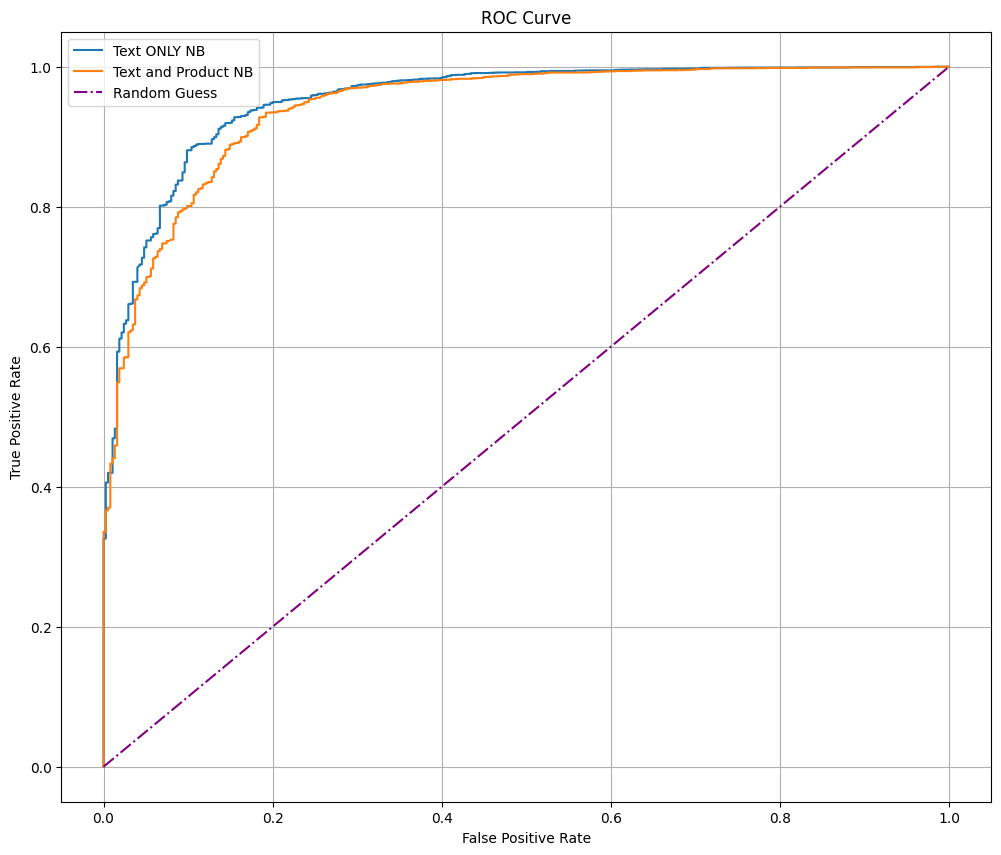

In [35]:
from sklearn.metrics import roc_curve

### Curve Plot 

# text only
fpr_text, tpr_text, threshold_text = roc_curve(y_test_amazon, clf.predict_proba(X_test_tfidf)[:, 1])

# text and producy
fpr_final, tpr_final, threshold_final = roc_curve(y_test_amazon, newCLF.predict_proba(X_test_final)[:, 1])

plt.figure(figsize=(12,10))
plt.plot(fpr_text, tpr_text, label="Text ONLY NB")
plt.plot(fpr_final, tpr_final, label="Text and Product NB")
plt.plot([0,1], [0,1], linestyle="dashdot", color="purple", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()